In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [5]:
# Read the csv file
data_csv = pd.read_csv("result_data/Results-March20-Import-Ready_columns_renamed.csv")
print(data_csv.set_index("Dataset").to_latex())

\begin{tabular}{lllrrrrrrrrrr}
\toprule
{} &   RWPE &  Model &  BACC (GN) &  AUROC (GN) &  F1 (GN) &  BACC (BN) &  AUROC (BN) &  F1 (BN) &  BACC (GN+OP) &  AUROC (GN+OP) &  F1 (GN+OP) &  Threshold \\
Dataset &        &        &            &             &          &            &             &          &               &                &             &            \\
\midrule
BFS     &  False &   dgcn &      0.715 &       0.809 &    0.155 &      0.704 &       0.783 &    0.141 &         0.577 &          0.807 &       0.131 &      0.925 \\
BFS     &  False &    gat &      0.699 &       0.792 &    0.153 &      0.681 &       0.717 &    0.101 &         0.598 &          0.843 &       0.241 &      0.961 \\
BFS     &  False &    gcn &      0.648 &       0.706 &    0.141 &      0.619 &       0.637 &    0.059 &         0.581 &          0.784 &       0.197 &      0.967 \\
BFS     &  False &    gps &      0.651 &       0.681 &    0.166 &      0.647 &       0.669 &    0.034 &         0.656 &          0.

In [2]:
# Read the csv file
data_csv = pd.read_csv("result_data/Results-March20-Import-Ready.csv")
data_csv.head()

,Dataset,RWPE,Model,BACC (Graph Norm),AUROC (Graph Norm),F1 (Graph Norm),BACC (Batch Norm),AUROC (Batch Norm),F1 (Batch Norm),BACC (Graph Norm OP),AUROC (Graph Norm OP),F1 (Graph Norm OP),Threshold
0,BFS,False,dgcn,0.715,0.809,0.155,0.704,0.783,0.141,0.577,0.807,0.131,0.925
1,BFS,False,gat,0.699,0.792,0.153,0.681,0.717,0.101,0.598,0.843,0.241,0.961
2,BFS,False,gcn,0.648,0.706,0.141,0.619,0.637,0.059,0.581,0.784,0.197,0.967
3,BFS,False,gps,0.651,0.681,0.166,0.647,0.669,0.034,0.656,0.807,0.111,0.797
4,BFS,False,gs,0.752,0.837,0.171,0.748,0.815,0.147,0.644,0.877,0.282,0.971


In [3]:
columns = ['Model', 'BACC (sam)','BACC (Batch Norm)', 'BACC (Graph Norm)', 'BACC (Graph Norm OP)',
           'AUROC (sam)', 'AUROC (Batch Norm)', 'AUROC (Graph Norm)', 'AUROC (Graph Norm OP)',
           'F1 (sam)', 'F1 (Batch Norm)','F1 (Graph Norm)', 'F1 (Graph Norm OP)']

In [4]:
columns = ['Model', 'F1 (sam)', 'F1 (Batch Norm)','F1 (Graph Norm)', 'F1 (Graph Norm OP)']

In [5]:
data = {
    "Model": ["gcn", "gs", "gat", "gin", "tgn", "dgcn", "rggcn"],
    "BACC (sam)": [0.624, 0.689, 0.670, 0.663, 0.673, 0.701, 0.702],
    "AUROC (sam)": [0.665, 0.775, 0.756, 0.756, 0.770, 0.787, 0.783],
    "F1 (sam)": [0.022, 0.041, 0.035, 0.036, 0.037, 0.035, 0.045],
}

df_rfs = pd.DataFrame(data)
our_rfs = data_csv[(data_csv["Dataset"] == "RFS") & (data_csv["RWPE"] == False)]
merged_df = our_rfs.merge(df_rfs, how="inner", on="Model")
print(merged_df[columns].set_index("Model").to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  F1 (sam) &  F1 (Batch Norm) &  F1 (Graph Norm) &  F1 (Graph Norm OP) \\
Model &           &                  &                  &                     \\
\midrule
dgcn  &     0.035 &            0.192 &            0.189 &               0.148 \\
gat   &     0.035 &            0.163 &            0.185 &               0.311 \\
gcn   &     0.022 &            0.089 &            0.181 &               0.253 \\
gs    &     0.041 &            0.153 &            0.196 &               0.329 \\
rggcn &     0.045 &            0.195 &            0.202 &               0.326 \\
\bottomrule
\end{tabular}



In [6]:
data = {
    "Model": ["gcn", "gs", "gat", "gin", "tgn", "dgcn", "rggcn"],
    "BACC (sam)": [0.689, 0.733, 0.738, 0.743, 0.713, 0.761, 0.762],
    "AUROC (sam)": [0.763, 0.822, 0.815, 0.827, 0.808, 0.824, 0.823],
    "F1 (sam)": [0.051, 0.063, 0.064, 0.075, 0.063, 0.059, 0.053]
}

df_bfs = pd.DataFrame(data)
our_bfs = data_csv[(data_csv["Dataset"] == "BFS") & (data_csv["RWPE"] == False)]
merged_df = our_bfs.merge(df_bfs, how="inner", on="Model")
print(merged_df[columns].set_index("Model").to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  F1 (sam) &  F1 (Batch Norm) &  F1 (Graph Norm) &  F1 (Graph Norm OP) \\
Model &           &                  &                  &                     \\
\midrule
dgcn  &     0.059 &            0.141 &            0.155 &               0.131 \\
gat   &     0.064 &            0.101 &            0.153 &               0.241 \\
gcn   &     0.051 &            0.059 &            0.141 &               0.197 \\
gs    &     0.063 &            0.147 &            0.171 &               0.282 \\
rggcn &     0.053 &            0.151 &            0.184 &               0.308 \\
\bottomrule
\end{tabular}



In [7]:
columns_new = [i for i in data_csv.columns if i not in ("Dataset", "Threshold", "RWPE")]
temp = data_csv[columns_new].reset_index(drop=True).groupby(by=["Model"]).agg(["mean", "std"]).reset_index()

clean_df = pd.DataFrame(columns=np.unique([i[0] for i in temp.columns]))
clean_df_columns = ["Model"] + sorted([i for i in clean_df.columns if i != "Model"])
clean_df = clean_df[clean_df_columns]
clean_df["Model"] = temp["Model"]

# Loop and make
for column in temp.columns:
    if column[0] not in "Model":
        clean_df[column[0]] = temp[column[0]]["mean"].apply(lambda x: round(x, 3)).astype(str) + " (" + temp[column[0]]["std"].apply(lambda x: round(x, 3)).astype(str) + ")"

section_a = ['Model', 'AUROC (Batch Norm)', 'BACC (Batch Norm)', 'F1 (Batch Norm)']
section_b = ['Model', 'AUROC (Graph Norm)', 'BACC (Graph Norm)', 'F1 (Graph Norm)']
section_c = ['Model', 'AUROC (Graph Norm OP)', 'BACC (Graph Norm OP)', 'F1 (Graph Norm OP)']
clean_df_section_a = clean_df[section_a]
clean_df_section_a.columns = ["Model", "AUROC", "BAAC", "F1"]
clean_df_section_b = clean_df[section_b]
clean_df_section_b.columns = ["Model", "AUROC", "BAAC", "F1"]
clean_df_section_b["Model"] = clean_df_section_b["Model"] + " + GN"
clean_df_section_c = clean_df[section_c]
clean_df_section_c.columns = ["Model", "AUROC", "BAAC", "F1"]
clean_df_section_c["Model"] = clean_df_section_c["Model"] + " + GN + OP"
final_df = pd.concat([clean_df_section_a, clean_df_section_b, clean_df_section_c], axis=0)
# print(final_df.set_index("Model").to_latex())

In [8]:
columns_new = [i for i in data_csv.columns if i not in ("Model", "Threshold", "RWPE")]
temp = data_csv[columns_new].reset_index(drop=True).groupby(by=["Dataset"]).agg(["mean", "std"]).reset_index()
clean_df = pd.DataFrame(columns=np.unique([i[0] for i in temp.columns]))
clean_df_columns = ["Dataset"] + sorted([i for i in clean_df.columns if i != "Dataset"])
clean_df = clean_df[clean_df_columns]
clean_df["Dataset"] = temp["Dataset"]

# Loop and make
for column in temp.columns:
    if column[0] not in "Dataset":
        clean_df[column[0]] = temp[column[0]]["mean"].apply(lambda x: round(x, 3)).astype(str) + " (" + temp[column[0]]["std"].apply(lambda x: round(x, 3)).astype(str) + ")"

section_a = ['Dataset', 'AUROC (Batch Norm)', 'BACC (Batch Norm)', 'F1 (Batch Norm)']
section_b = ['Dataset', 'AUROC (Graph Norm)', 'BACC (Graph Norm)', 'F1 (Graph Norm)']
section_c = ['Dataset', 'AUROC (Graph Norm OP)', 'BACC (Graph Norm OP)', 'F1 (Graph Norm OP)']
clean_df_section_a = clean_df[section_a]
clean_df_section_a.columns = ["Dataset", "AUROC", "BAAC", "F1"]
clean_df_section_b = clean_df[section_b]
clean_df_section_b.columns = ["Dataset", "AUROC", "BAAC", "F1"]
clean_df_section_b["Dataset"] = clean_df_section_b["Dataset"] + " + GN"
clean_df_section_c = clean_df[section_c]
clean_df_section_c.columns = ["Dataset", "AUROC", "BAAC", "F1"]
clean_df_section_c["Dataset"] = clean_df_section_c["Dataset"] + " + GN + OP"
final_df = pd.concat([clean_df_section_a, clean_df_section_b, clean_df_section_c], axis=0)
# print(final_df.set_index("Dataset").to_latex())

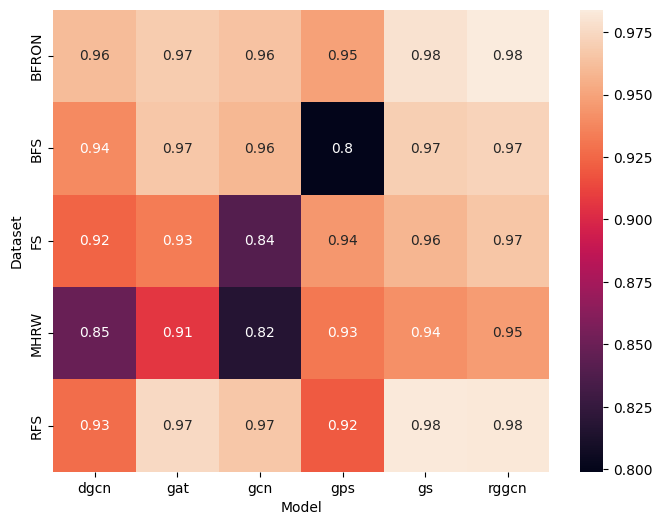

In [9]:
plt.figure(figsize=(8, 6))
temp = data_csv[data_csv["Model"] != "lgbm"].reset_index(drop=True).groupby(by=["Dataset", "Model"]).mean().reset_index()
temp_pivot = pd.pivot(temp, "Dataset", "Model", "Threshold")
sns.heatmap(temp_pivot, annot=True)
plt.show()

In [10]:
def plot_diagram_d(data, metric_value):
    '''Draws the chart for dataset vs matric_value differentiated by model'''
    # Collect all the data
    data_no_rwpe = data[(data["RWPE"] == False) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Dataset", "Model"]).mean().reset_index()
    data_rwpe = data[(data["RWPE"] == True) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Dataset", "Model"]).mean().reset_index()

    # Define the figure and axes
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(18, 6))

    # Data with no randomwalk
    sns.barplot(data=data_no_rwpe, x="Dataset", y=metric_value, hue="Model", edgecolor="black", ax=axes[0])
    axes[0].set_title(f'Sampling vs {metric_value} vs Models no RWPE')
    axes[0].set_xlabel('Sampling')
    axes[0].set_ylabel('Metric Value')

    # Data random walk positional embedding
    sns.barplot(data=data_rwpe, x="Dataset", y=metric_value, hue="Model", edgecolor="black", ax=axes[1])
    axes[1].set_title(f'Sampling vs {metric_value} vs Models with RWPE')
    axes[1].set_xlabel('Sampling')
    axes[1].set_ylabel('Metric Value')

    plt.show()

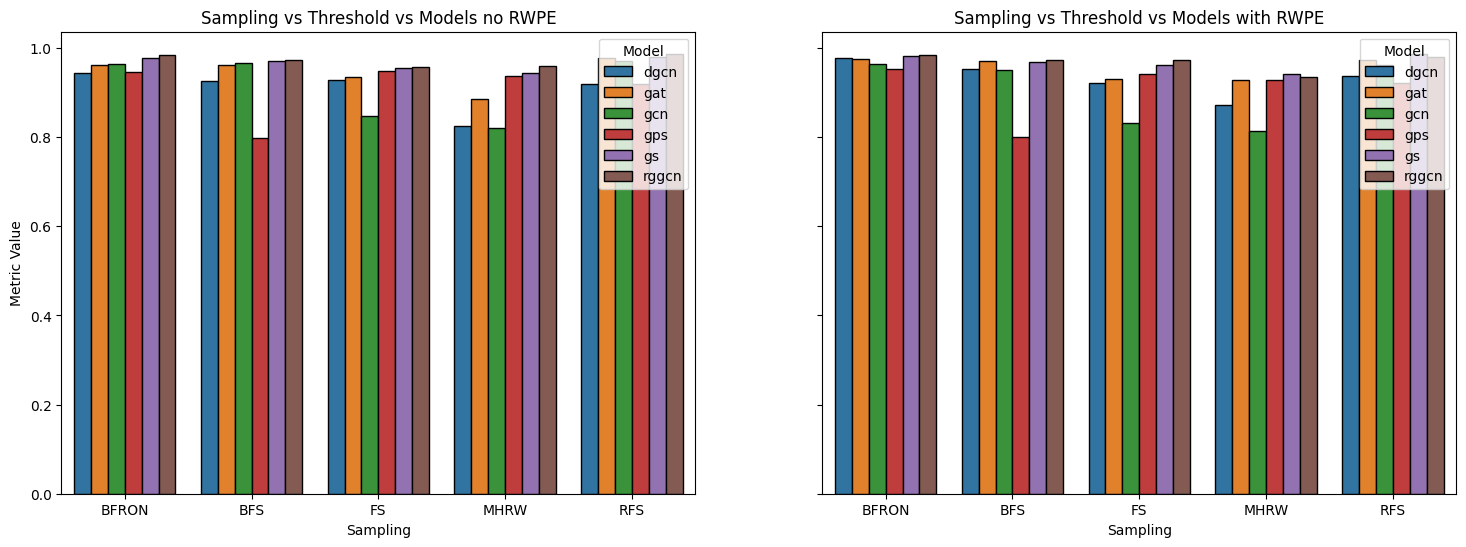

In [11]:
plot_diagram_d(data=data_csv.copy(), metric_value="Threshold")

In [12]:
def plot_diagram_e(data, metric_value):
    '''Draws the chart for dataset vs matric_value differentiated by model'''
    # Collect all the data
    data_no_rwpe = data[(data["RWPE"] == False) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Model"]).mean().reset_index()
    data_rwpe = data[(data["RWPE"] == True) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Model"]).mean().reset_index()

    # Define the figure and axes
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 6))

    # Data with no randomwalk
    sns.pointplot(data=data_no_rwpe, x="Model", y=metric_value, ax=axes[0])
    axes[0].set_title(f'{metric_value} vs Models no RWPE')
    axes[0].set_xlabel('Model')
    axes[0].set_ylabel('Metric Value')

    # Data random walk positional embedding
    sns.pointplot(data=data_rwpe, x="Model", y=metric_value, ax=axes[1])
    axes[1].set_title(f'{metric_value} vs Models with RWPE')
    axes[1].set_xlabel('Model')
    axes[1].set_ylabel('Metric Value')

    plt.show()

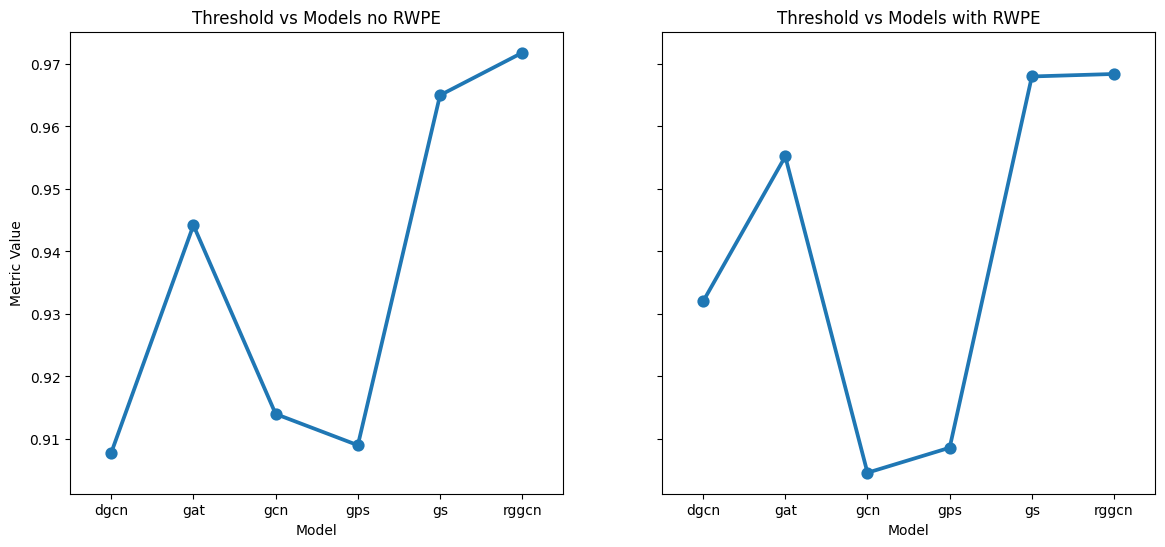

In [13]:
plot_diagram_e(data=data_csv.copy(), metric_value="Threshold")

In [14]:
def plot_diagram_c(data, metric_value):
    '''Draws the chart for dataset vs matric_value differentiated by model'''
    # Collect all the data
    data_no_rwpe = data[(data["RWPE"] == False) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Model"]).mean().reset_index()
    data_rwpe = data[(data["RWPE"] == True) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Model"]).mean().reset_index()

    # Define the figure and axes
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 6))

    # Data with no randomwalk
    sns.pointplot(data=data_no_rwpe, x="Model", y=metric_value, ax=axes[0])
    axes[0].set_title(f'{metric_value} vs Models no RWPE')
    axes[0].set_xlabel('Model')
    axes[0].set_ylabel('Metric Value')

    # Data random walk positional embedding
    sns.pointplot(data=data_rwpe, x="Model", y=metric_value, ax=axes[1])
    axes[1].set_title(f'{metric_value} vs Models with RWPE')
    axes[1].set_xlabel('Model')
    axes[1].set_ylabel('Metric Value')

    plt.show()

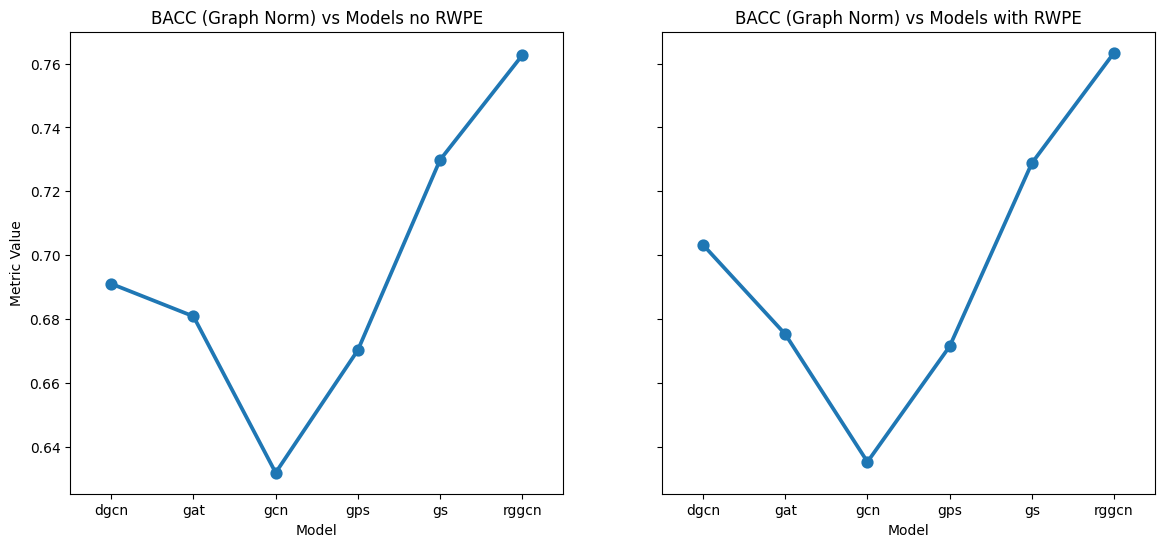

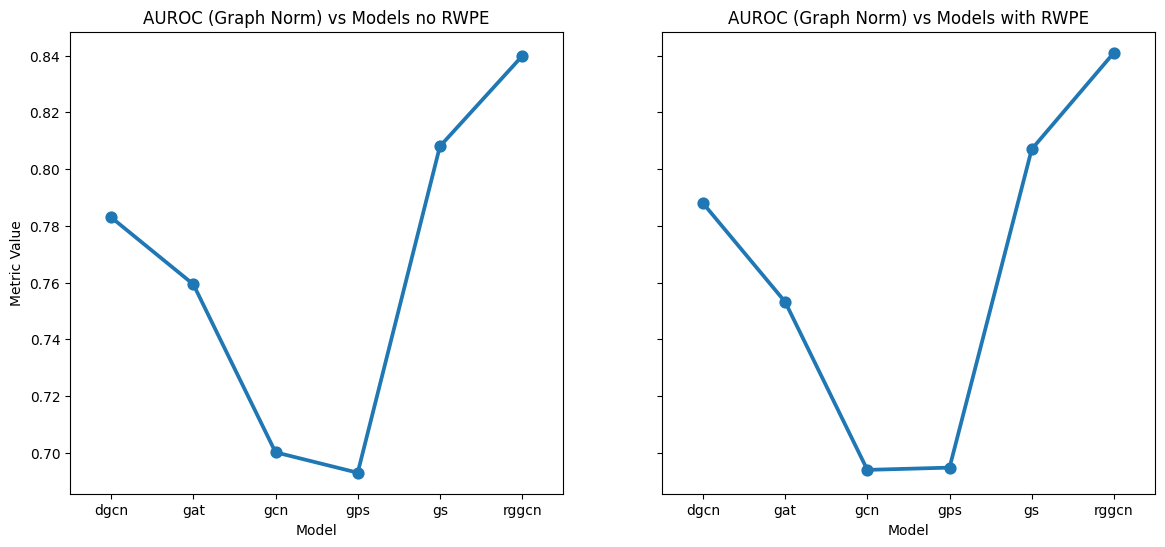

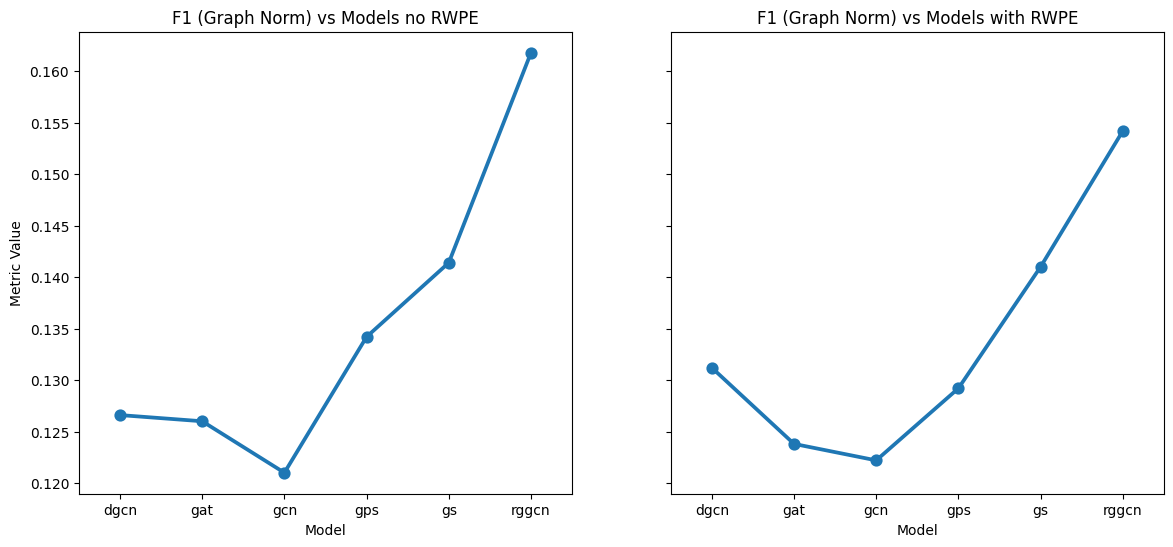

In [15]:
plot_diagram_c(data=data_csv.copy(), metric_value="BACC (Graph Norm)")
plot_diagram_c(data=data_csv.copy(), metric_value="AUROC (Graph Norm)")
plot_diagram_c(data=data_csv.copy(), metric_value="F1 (Graph Norm)")

In [16]:
def plot_diagram_b(data, metric_value):
    '''Draws the chart for dataset vs matric_value differentiated by model'''
    # Collect all the data
    data_no_rwpe = data[(data["RWPE"] == False) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Dataset", "Model"]).mean().reset_index()
    data_rwpe = data[(data["RWPE"] == True) & (data["Model"] != "lgbm")].reset_index(drop=True).groupby(by=["Dataset", "Model"]).mean().reset_index()

    # Define the figure and axes
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(18, 6))

    # Data with no randomwalk
    sns.barplot(data=data_no_rwpe, x="Dataset", y=metric_value, hue="Model", edgecolor="black", ax=axes[0])
    axes[0].set_title(f'Sampling vs {metric_value} vs Models no RWPE')
    axes[0].set_xlabel('Sampling')
    axes[0].set_ylabel('Metric Value')

    # Data random walk positional embedding
    sns.barplot(data=data_rwpe, x="Dataset", y=metric_value, hue="Model", edgecolor="black", ax=axes[1])
    axes[1].set_title(f'Sampling vs {metric_value} vs Models with RWPE')
    axes[1].set_xlabel('Sampling')
    axes[1].set_ylabel('Metric Value')

    plt.show()

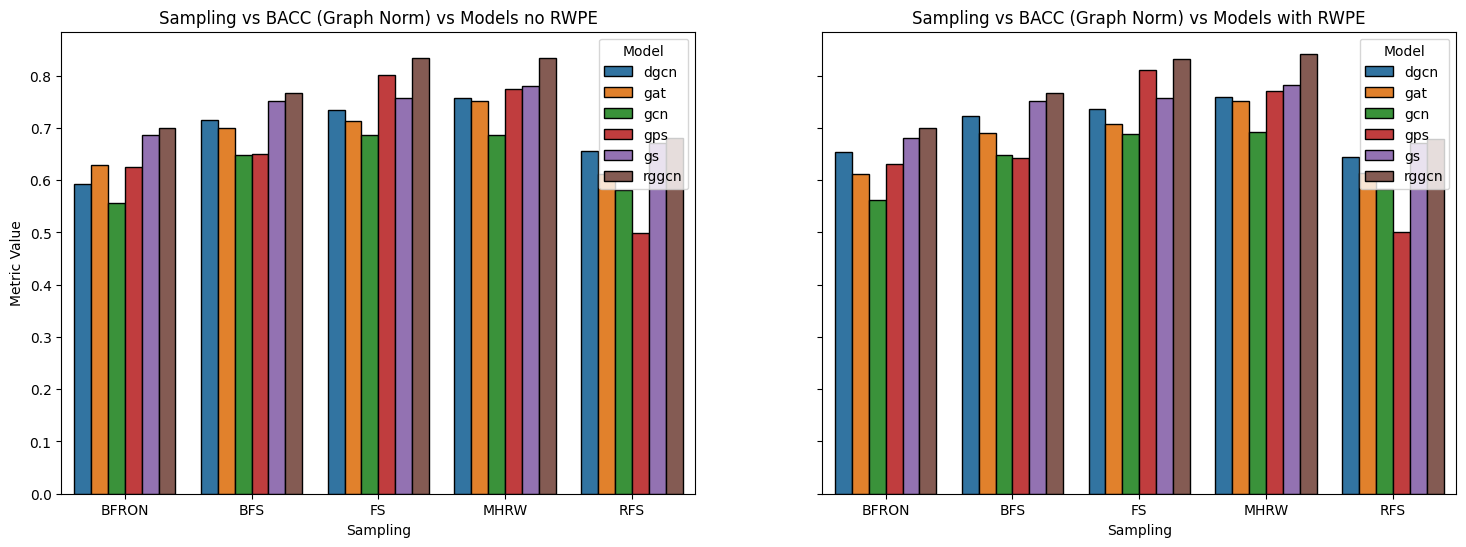

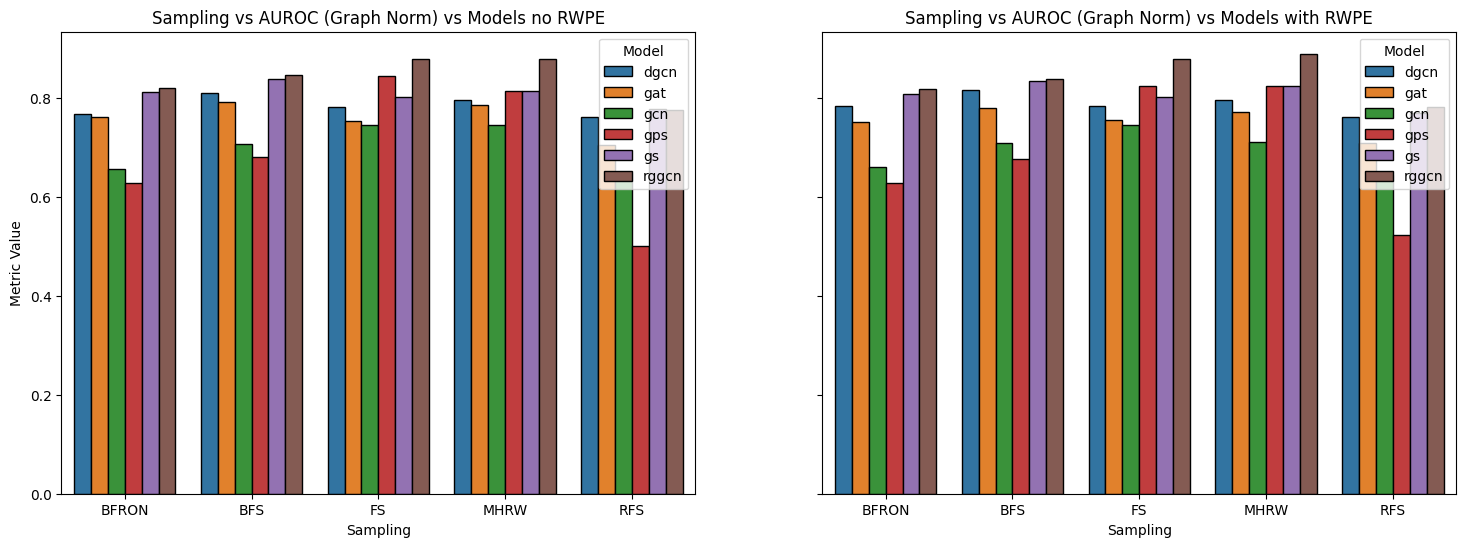

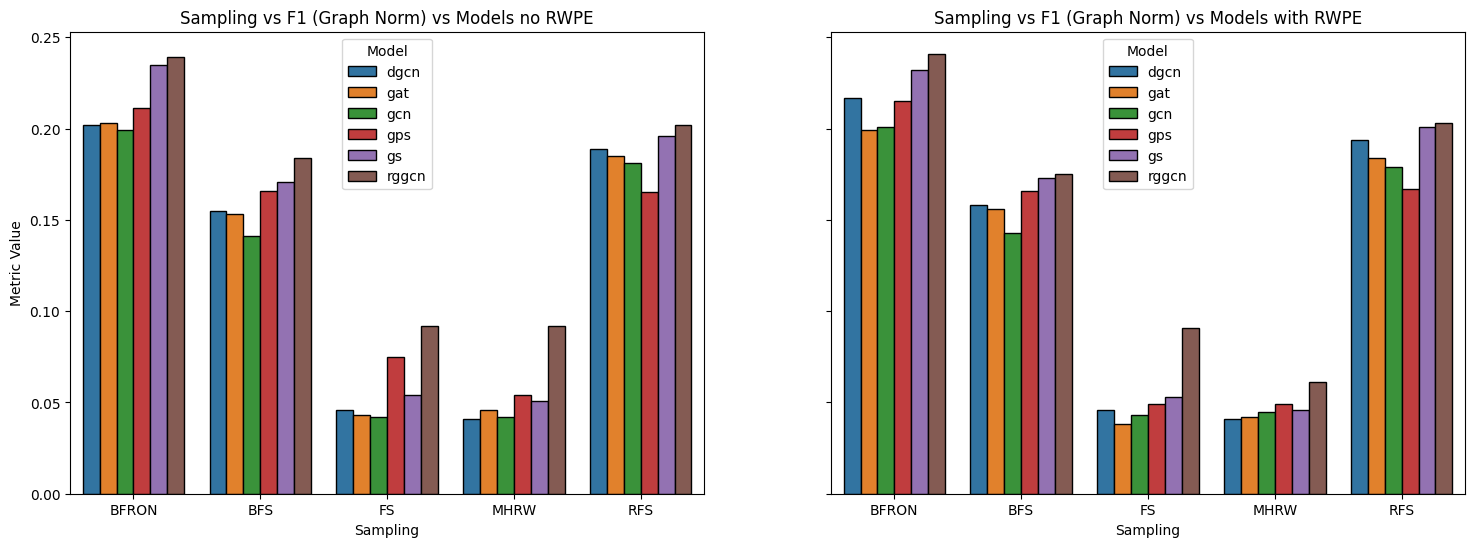

In [17]:
plot_diagram_b(data=data_csv.copy(), metric_value="BACC (Graph Norm)")
plot_diagram_b(data=data_csv.copy(), metric_value="AUROC (Graph Norm)")
plot_diagram_b(data=data_csv.copy(), metric_value="F1 (Graph Norm)")

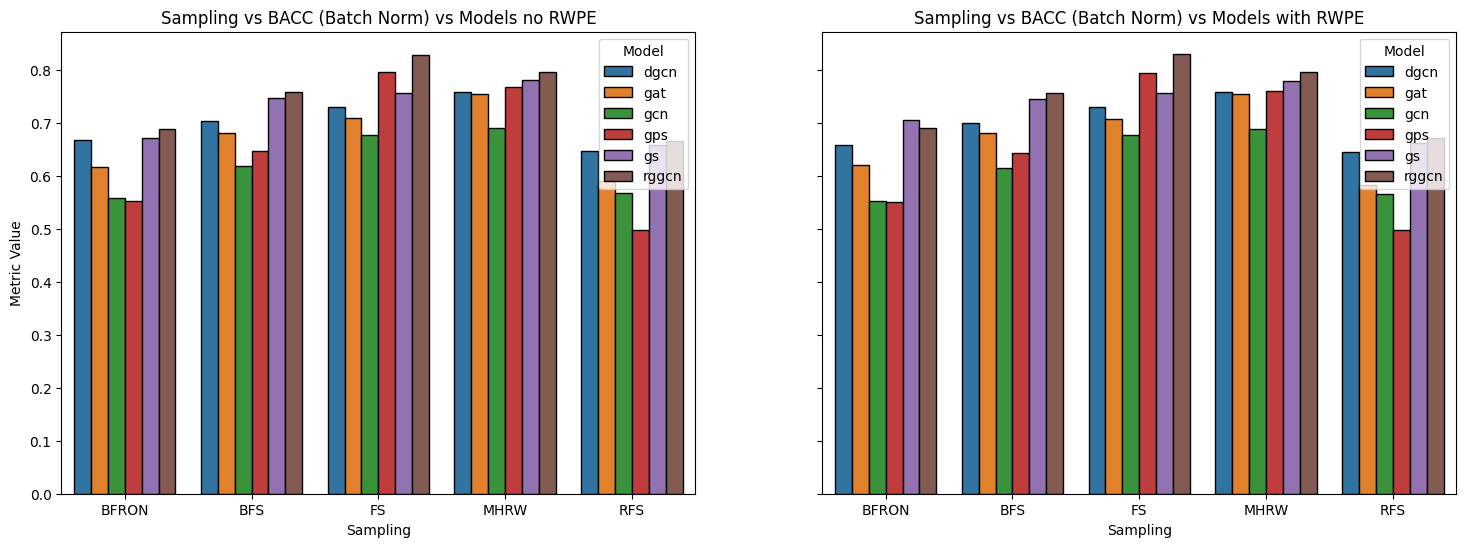

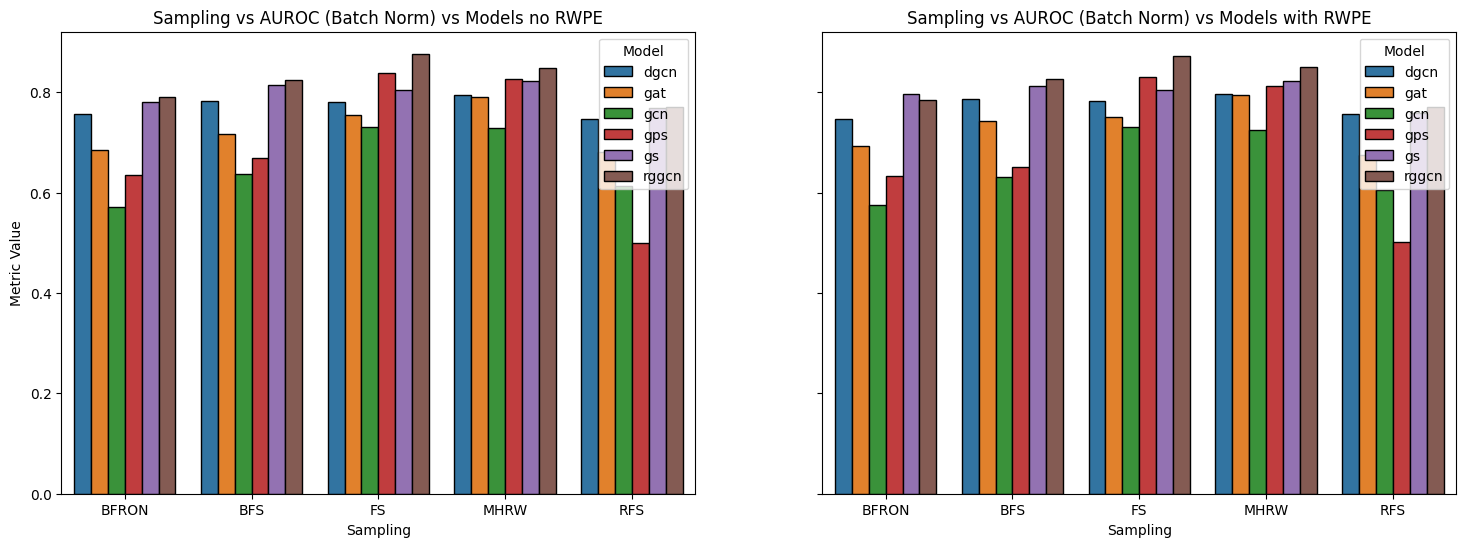

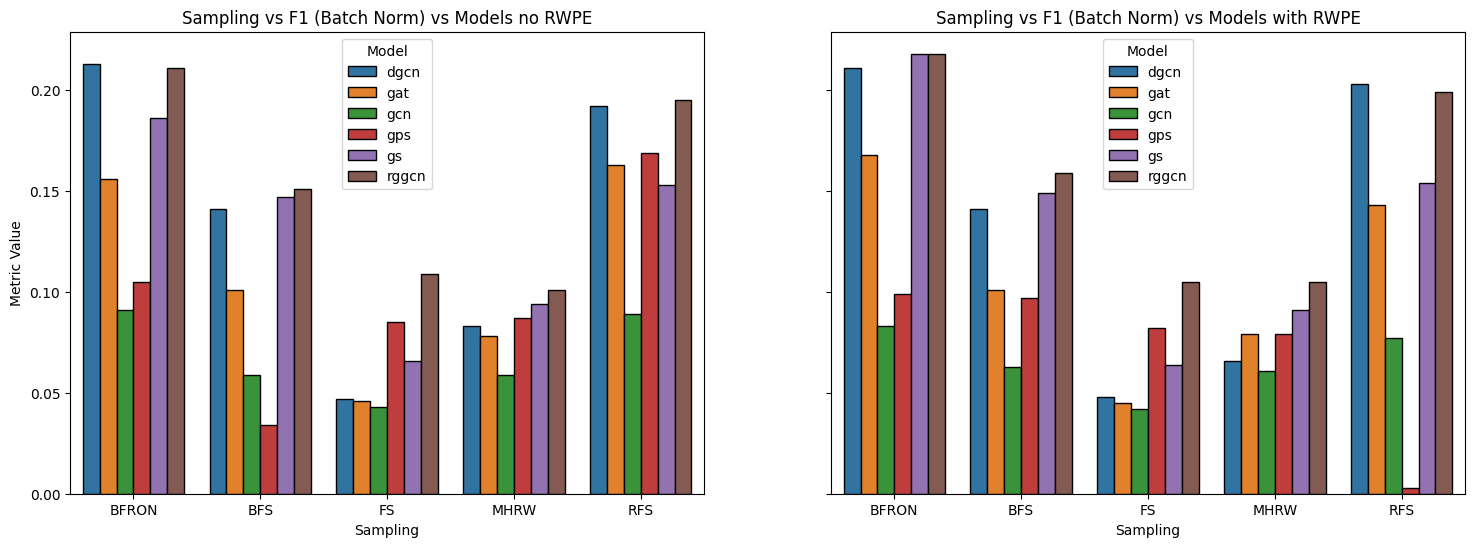

In [18]:
plot_diagram_b(data=data_csv.copy(), metric_value="BACC (Batch Norm)")
plot_diagram_b(data=data_csv.copy(), metric_value="AUROC (Batch Norm)")
plot_diagram_b(data=data_csv.copy(), metric_value="F1 (Batch Norm)")

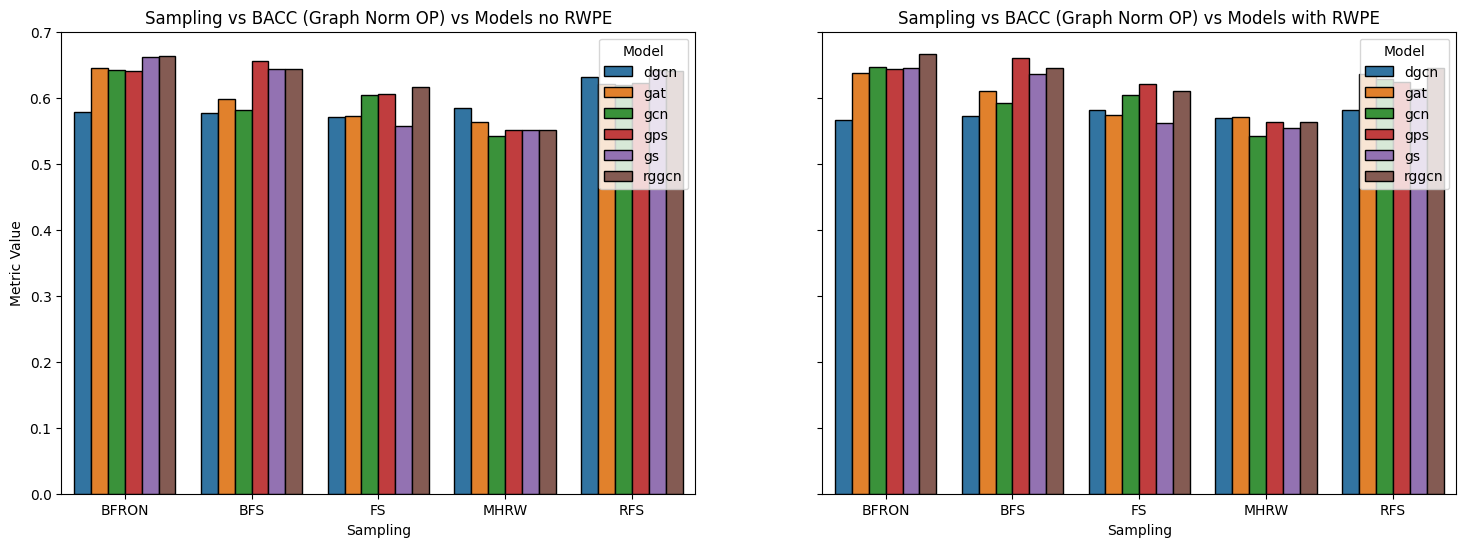

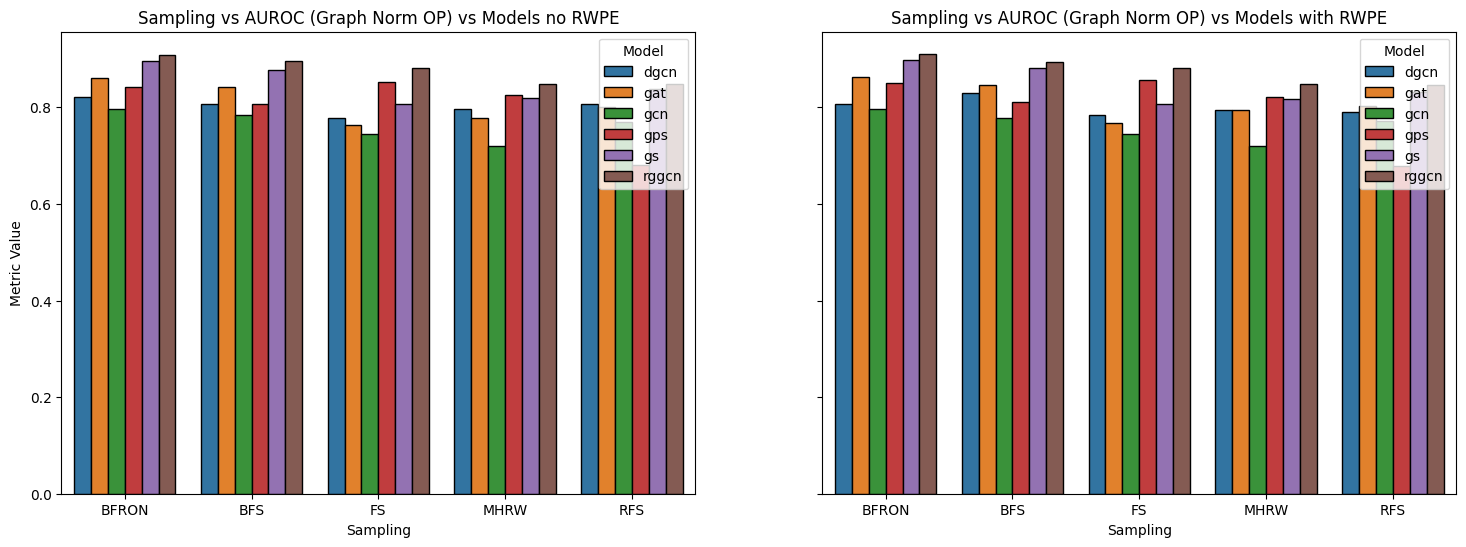

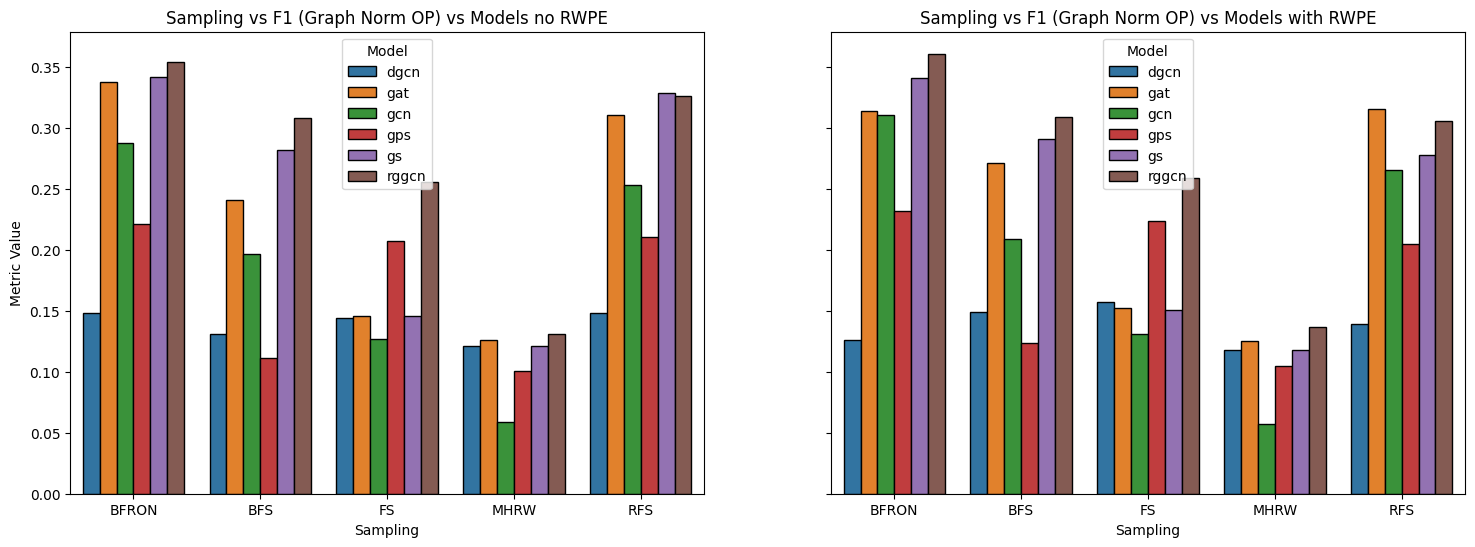

In [19]:
plot_diagram_b(data=data_csv.copy(), metric_value="BACC (Graph Norm OP)")
plot_diagram_b(data=data_csv.copy(), metric_value="AUROC (Graph Norm OP)")
plot_diagram_b(data=data_csv.copy(), metric_value="F1 (Graph Norm OP)")

In [20]:
def plot_diagram_a(data, metric_value):
    '''Draws the chart for dataset vs matric_value differentiated by model'''
    # Collect all the data
    data_new = data[data["Model"] != "lgbm"].reset_index(drop=True)
    data_no_rwpe = data[(data["RWPE"] == False) & (data["Model"] != "lgbm")].reset_index(drop=True)
    data_rwpe = data[(data["RWPE"] == True) & (data["Model"] != "lgbm")].reset_index(drop=True)

    # Define the figure and axes
    fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

    # All the data
    sns.lineplot(data=data_new, x="Dataset", y=metric_value, hue="Model", marker='o', ax=axes[0])
    axes[0].set_title(f'Sampling vs {metric_value} vs Models')
    axes[0].set_xlabel('Sampling')
    axes[0].set_ylabel('Metric Value')

    # Data no random walk positional embedding
    sns.lineplot(data=data_no_rwpe, x="Dataset", y=metric_value, hue="Model", marker='o', ax=axes[1])
    axes[1].set_title(f'Sampling vs {metric_value} vs Models no RWPE')
    axes[1].set_xlabel('Sampling')
    axes[1].set_ylabel('Metric Value')

    # Data random walk positional embedding
    sns.lineplot(data=data_rwpe, x="Dataset", y=metric_value, hue="Model", marker='o', ax=axes[2])
    axes[2].set_title(f'Sampling vs {metric_value} vs Models with RWPE')
    axes[2].set_xlabel('Sampling')
    axes[2].set_ylabel('Metric Value')

    plt.show()

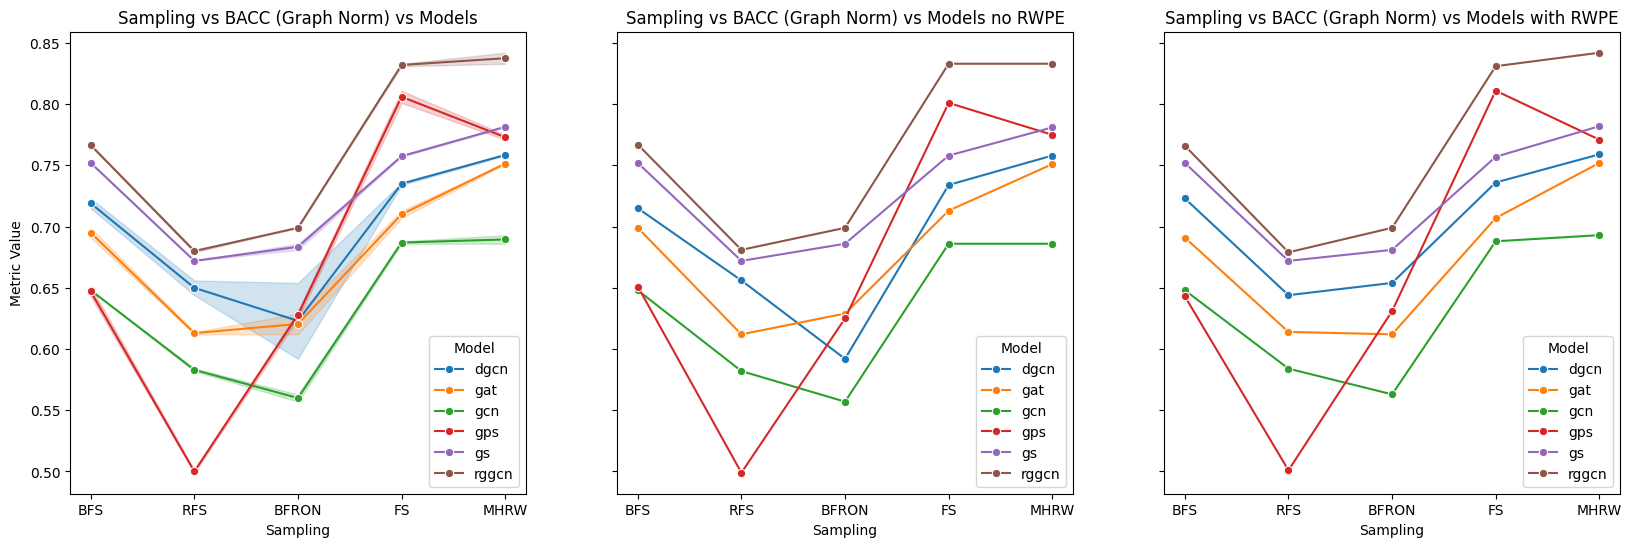

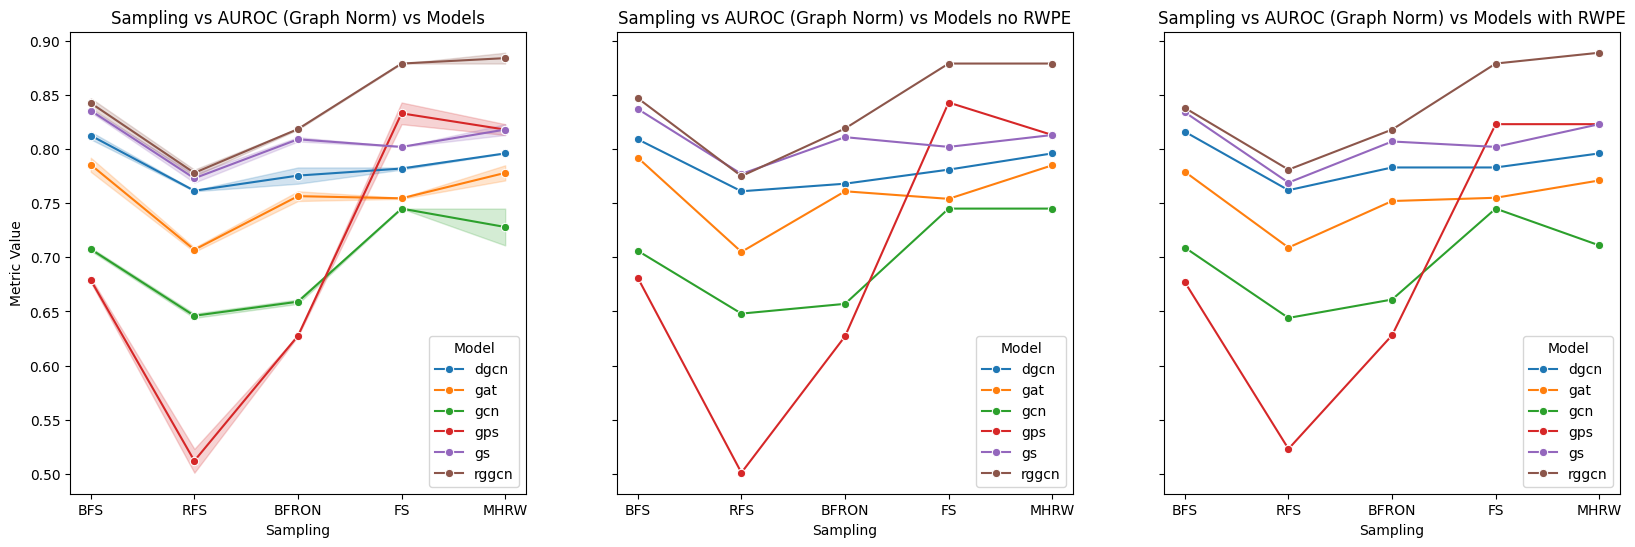

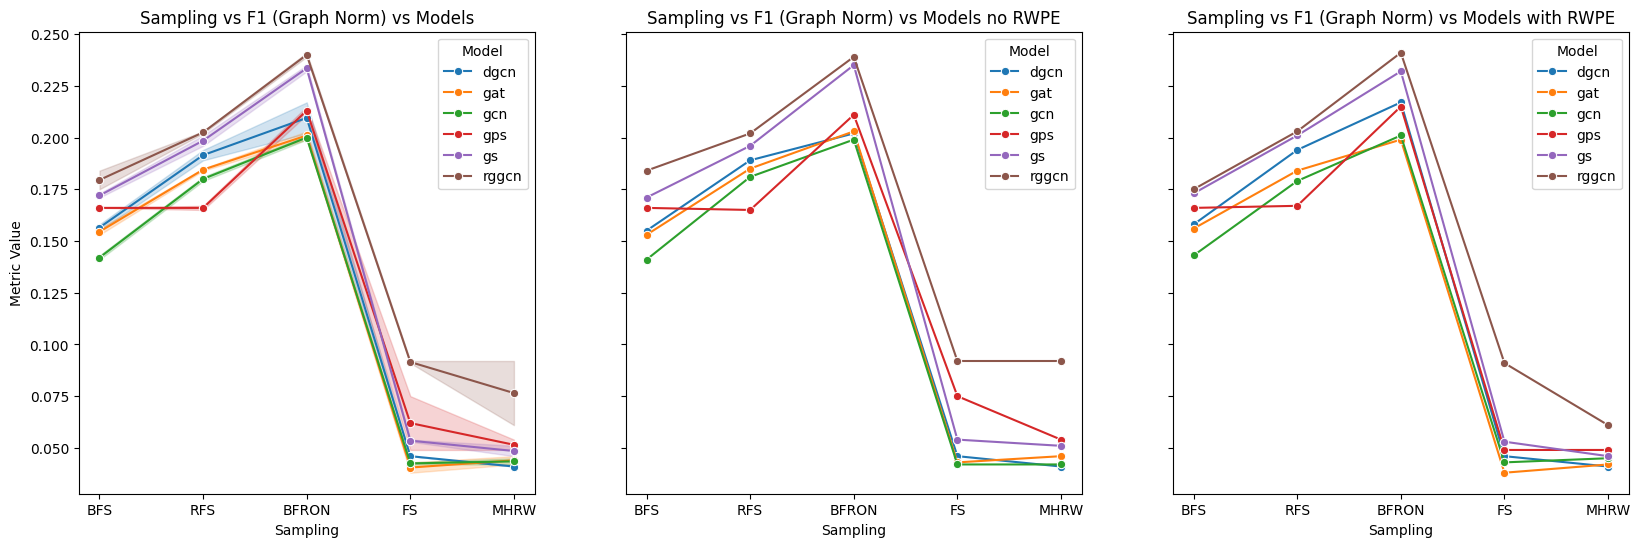

In [21]:
plot_diagram_a(data=data_csv.copy(), metric_value="BACC (Graph Norm)")
plot_diagram_a(data=data_csv.copy(), metric_value="AUROC (Graph Norm)")
plot_diagram_a(data=data_csv.copy(), metric_value="F1 (Graph Norm)")

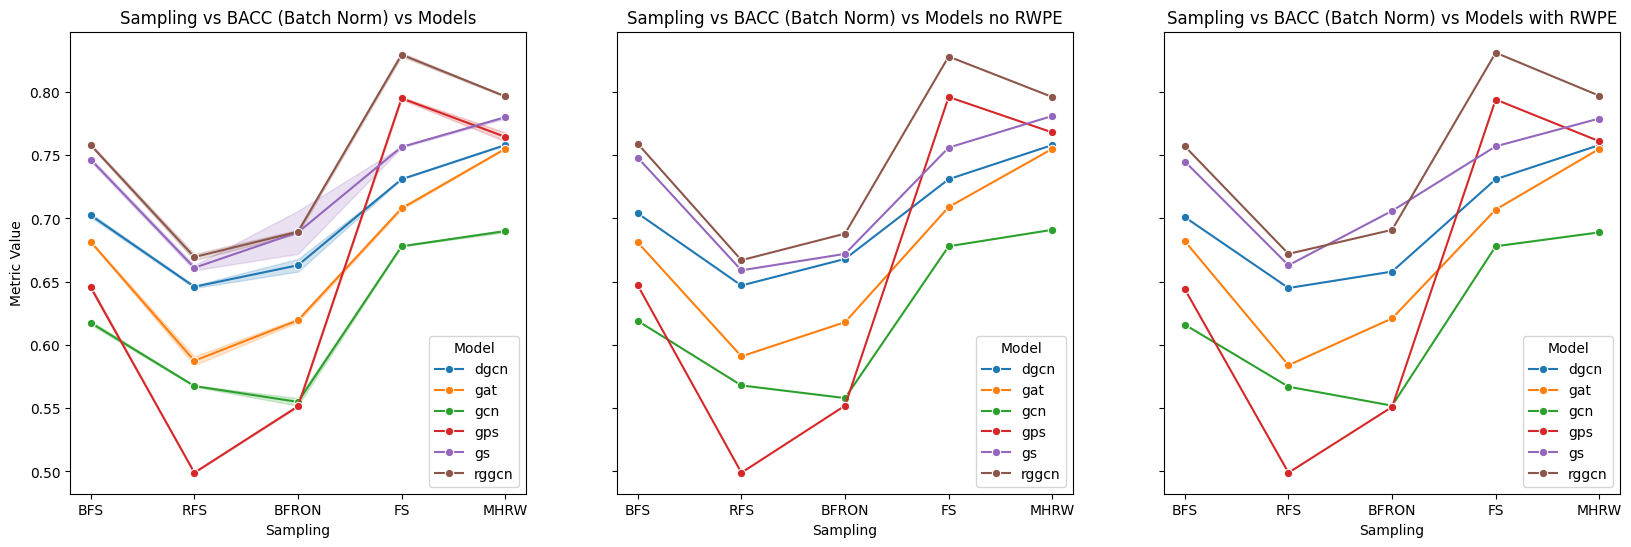

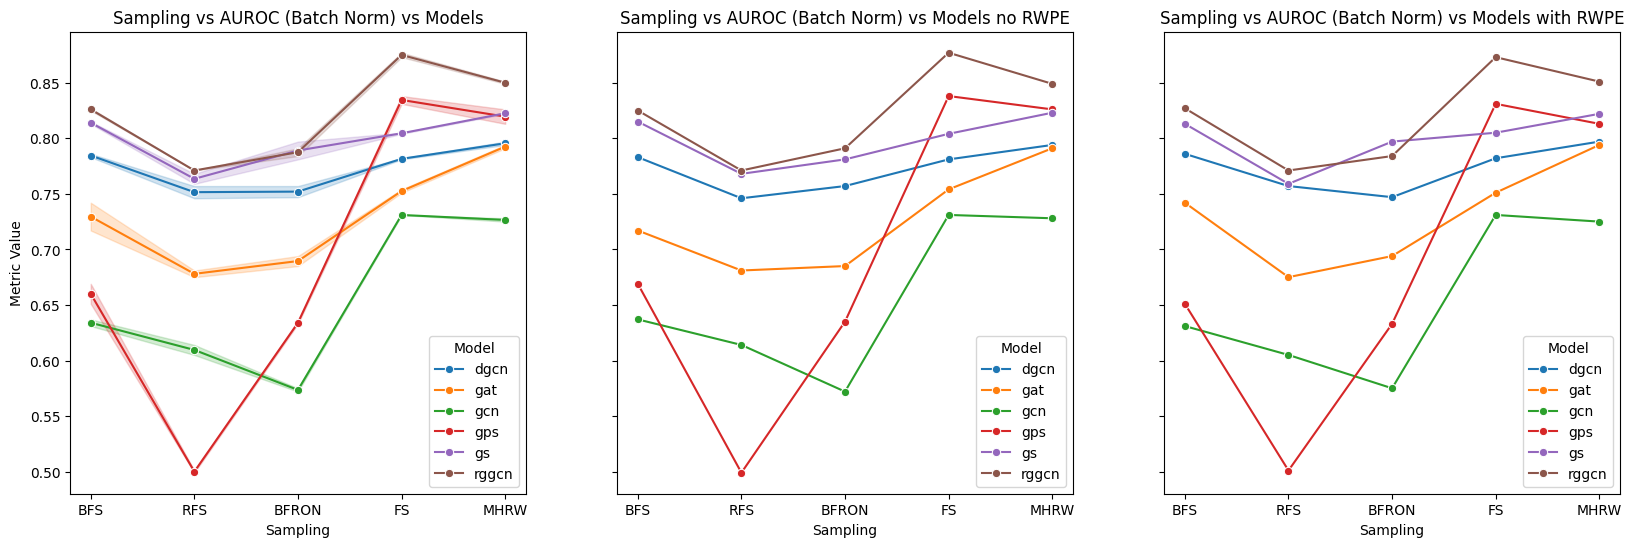

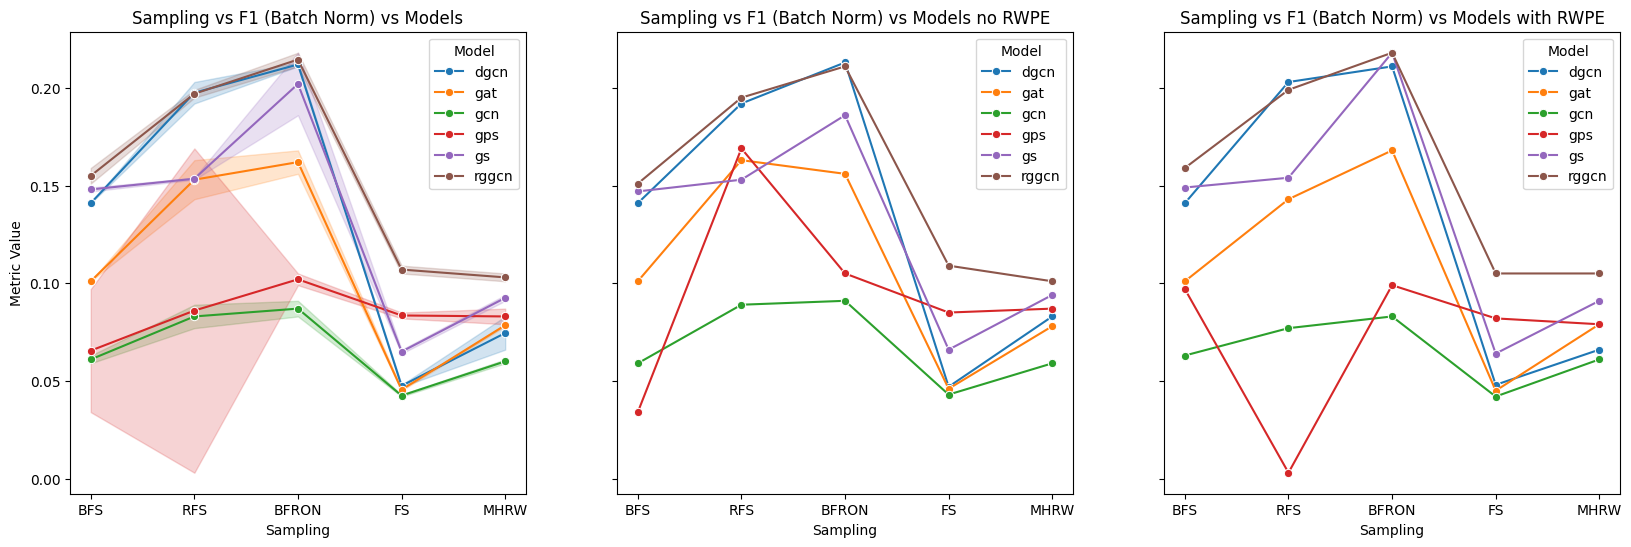

In [22]:
plot_diagram_a(data=data_csv.copy(), metric_value="BACC (Batch Norm)")
plot_diagram_a(data=data_csv.copy(), metric_value="AUROC (Batch Norm)")
plot_diagram_a(data=data_csv.copy(), metric_value="F1 (Batch Norm)")

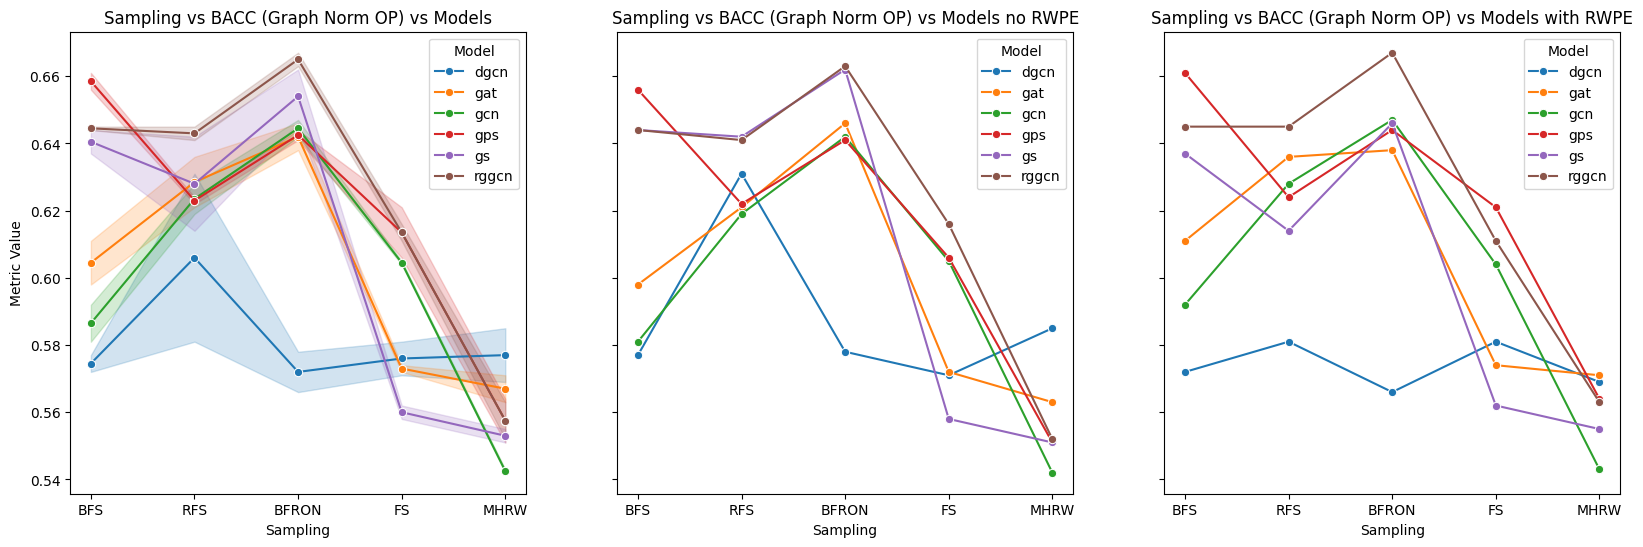

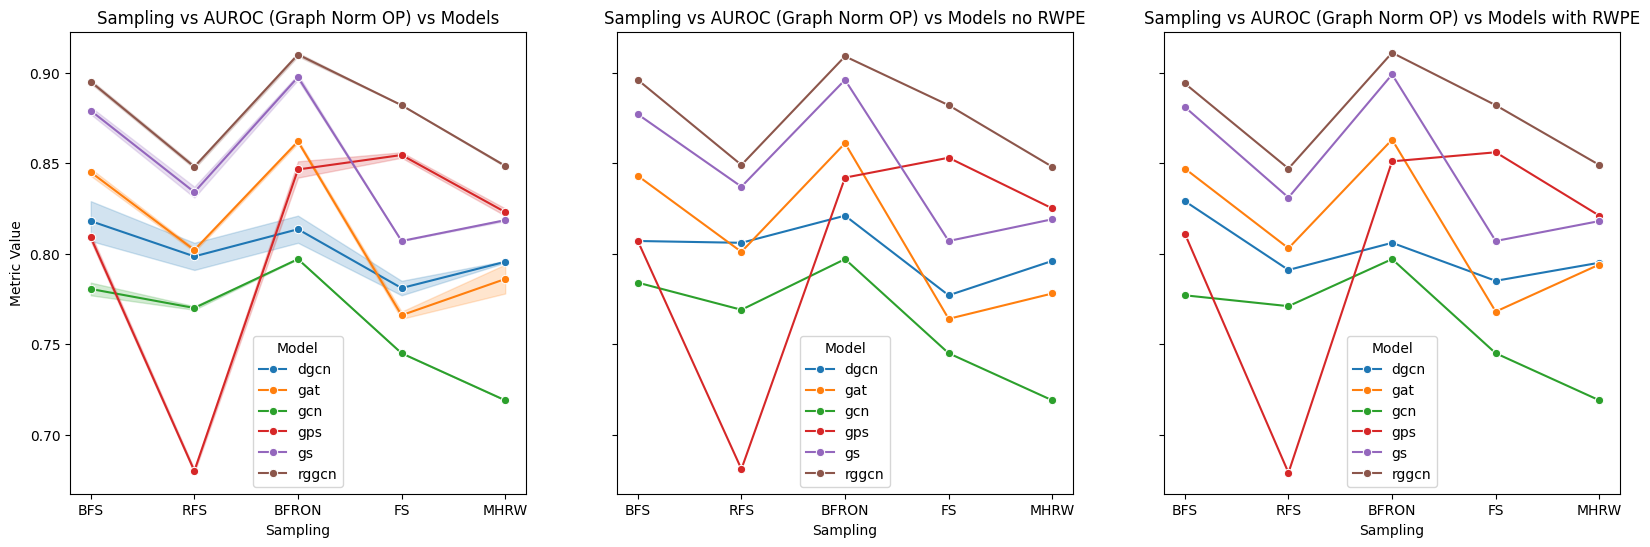

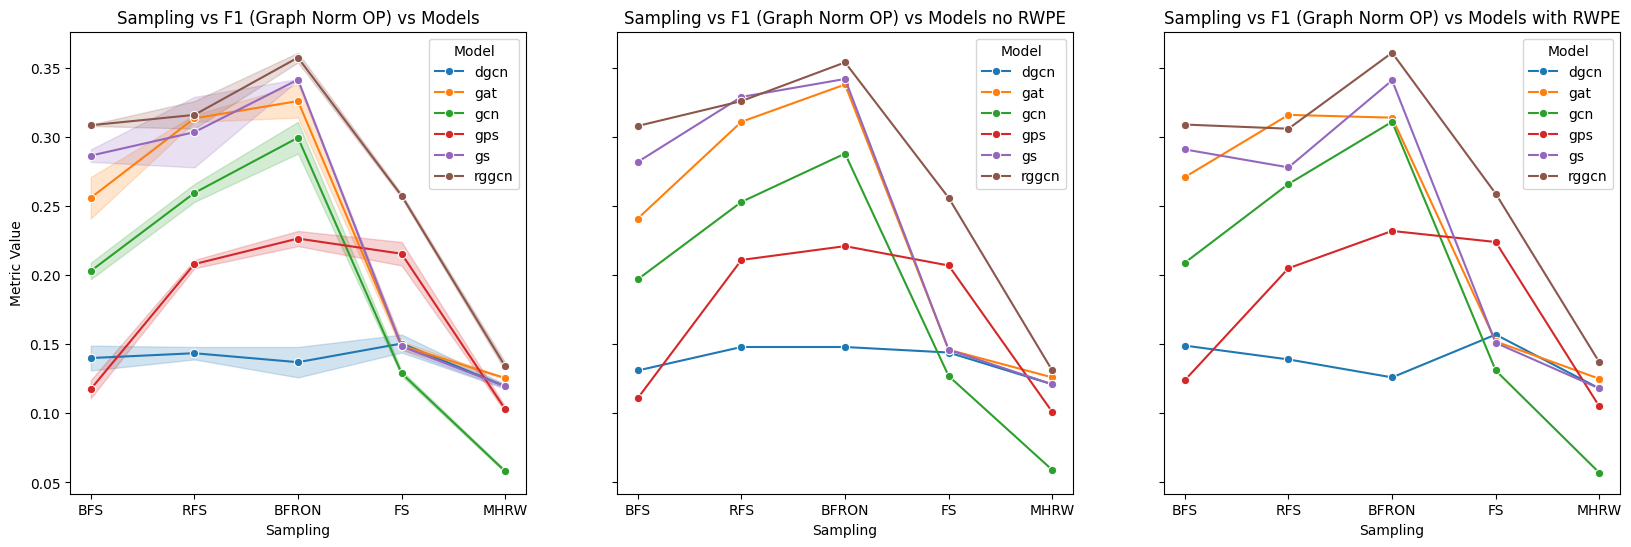

In [23]:
plot_diagram_a(data=data_csv.copy(), metric_value="BACC (Graph Norm OP)")
plot_diagram_a(data=data_csv.copy(), metric_value="AUROC (Graph Norm OP)")
plot_diagram_a(data=data_csv.copy(), metric_value="F1 (Graph Norm OP)")